# Imports

In [30]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import random
import pandas as pd

# Récupérer les données

In [31]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(image_train, label_train), (image_test, label_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = image_train.astype("float32") / 255
x_test = image_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(image_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape,", train samples:" , x_train.shape[0], ", test samples:",x_test.shape[0])

x_train shape: (60000, 28, 28, 1) , train samples: 60000 , test samples: 10000


Les images du dataset sont en fait des matrices de 28x28 qui contiennent donc 255 données. Chaque données sont un chiffre de 0 a 9.
On les normalise ensuite avec la fonction "normalize" qui est utile pour normaliser les données entre 0 et 1
De plus on utilisers l'encodage one-hot pour nos labels.
Le label [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] nous indique que notre digit est un 8.

On normalise les données d'entrainement et on transforme les labels en vecteur de taille 10.

In [32]:
x_train = keras.utils.normalize(x_train,axis=1)
x_test = keras.utils.normalize(x_test,axis=1)

#Passage en one-hot
y_train = keras.utils.to_categorical(label_train)
y_test = keras.utils.to_categorical(label_test)

On peut afficher au hasard une image du dataset d'entrainement avec son label pour observer le résultat.

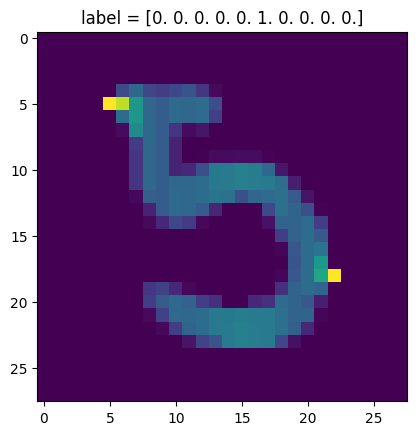

In [33]:
index = random.randint(0,len(x_train))
plt.imshow(x_train[index])
plt.title("label = " + str(y_train[index]))
plt.show()

# Fonctions utilitaires
Nous créons quelques fonctions qui nous serons utiles plus tard :
- une pour afficher la performance du model en fonction du nombre d'epoch
- un pour entrainer le model

In [34]:
def createGraph(history,num_of_layer):

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model accuracy with ' + str(num_of_layer) + ' layers')
    ax1.set(xlabel='epoch', ylabel='accuracy')
    """ax1.ylabel('accuracy')
    ax1.xlabel('epoch')"""
    ax1.legend(['train data', 'validation data'], loc='upper left')
    # plt.show()

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model loss with ' + str(num_of_layer) + ' layers')
    ax2.set(xlabel='epoch', ylabel='loss')
    """ax2.ylabel('loss')
    ax2.xlabel('epoch')"""
    ax2.legend(['train data', 'validation data'], loc='upper right')
    plt.show()

In [35]:
def modelTraining(model,train_data,train_label,validation_data,validation_labels,epochs=3,batch_size=32):
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(train_data,train_label,epochs=epochs,batch_size=batch_size,validation_data=(validation_data,validation_labels))
    createGraph(history,len(model.layers)-1)

# Model avec 0 couche cachée
On commence pour tester le model de base un model sans "hidden layers". La couche de sortie sera toujours de 10 car il y a 10 chiffres possibles.

Vu que les données d'entrées sont des matrice de 28x28 on doit les reduire en un vector, qui sera de taille 784. On utilise pour cela "layers.flatten"

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5608 - accuracy: 0.8658 - val_loss: 0.3436 - val_accuracy: 0.9071
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3354 - accuracy: 0.9049 - val_loss: 0.3097 - val_accuracy: 0.9161
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3116 - accuracy: 0.9123 - val_loss: 0.2999 - val_accuracy: 0.9192
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2998 - accuracy: 0.9164 - val_loss: 0.2926 - val_accuracy: 0.9200
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2929 - accuracy: 0.9180 - val_loss: 0.2911 - val_accuracy: 0.9214


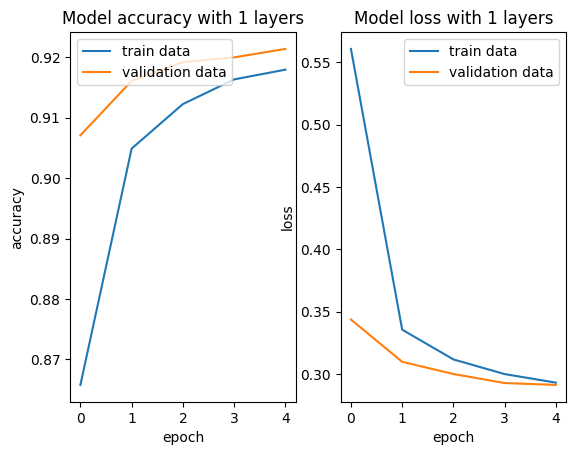

In [36]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

modelTraining(model,x_train, y_train,x_test,y_test,5)

# Model avec 1 couche cachée


Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3138 - accuracy: 0.9130 - val_loss: 0.1818 - val_accuracy: 0.9469
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1522 - accuracy: 0.9545 - val_loss: 0.1305 - val_accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1094 - accuracy: 0.9671 - val_loss: 0.1106 - val_accuracy: 0.9661
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0857 - accuracy: 0.9749 - val_loss: 0.1015 - val_accuracy: 0.9696
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0704 - accuracy: 0.9793 - val_loss: 0.0940 - val_accuracy: 0.9709


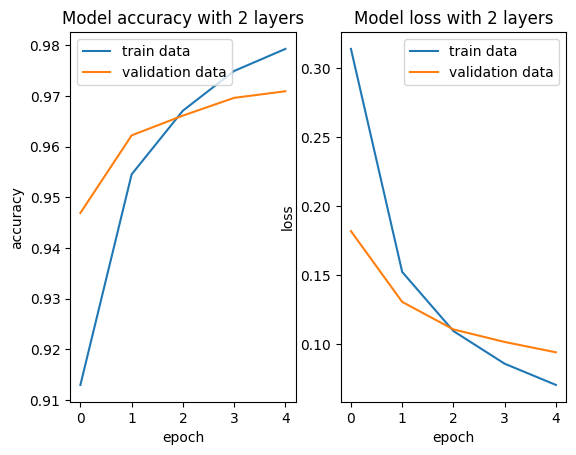

In [37]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

modelTraining(model,x_train, y_train,x_test,y_test,5)

# Model avec 2 couches cachées

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2613 - accuracy: 0.9230 - val_loss: 0.1354 - val_accuracy: 0.9587
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1133 - accuracy: 0.9658 - val_loss: 0.1051 - val_accuracy: 0.9684
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0823 - accuracy: 0.9755 - val_loss: 0.0975 - val_accuracy: 0.9721
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0639 - accuracy: 0.9809 - val_loss: 0.0946 - val_accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0524 - accuracy: 0.9844 - val_loss: 0.0994 - val_accuracy: 0.9722


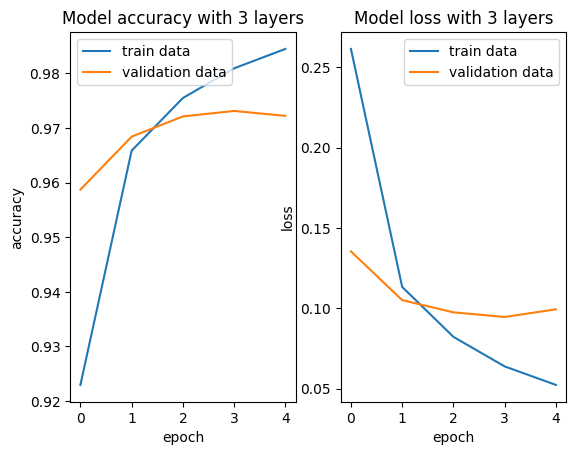

In [38]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

modelTraining(model,x_train, y_train,x_test,y_test,5)

In [39]:
prediction = model.predict(image_test)
print(pd.crosstab(label_test,prediction.argmax(axis=1),colnames=["Prédiction"], margins=True))

313/313 [==============================] - 1s 3ms/step
Prédiction    0     1     2     3    4    5    6    7     8    9    All
row_0                                                                  
0           970     0     3     0    0    0    3    1     3    0    980
1             0  1129     1     1    0    0    1    1     2    0   1135
2             5    10   995     7    2    0    2    7     4    0   1032
3             0     5     6   983    0    1    0    4     8    3   1010
4             2    17     4     0  936    0    5    1     5   12    982
5             5    18     0    50    3  773   16    2    19    6    892
6             4     4     1     0    4    2  939    0     4    0    958
7             3    35     7     2    2    0    0  970     3    6   1028
8             3     8     4     4    3    1    1    1   949    0    974
9             2    14     1     5   13    1    1   10     9  953   1009
All         994  1240  1022  1052  963  778  968  997  1006  980  10000


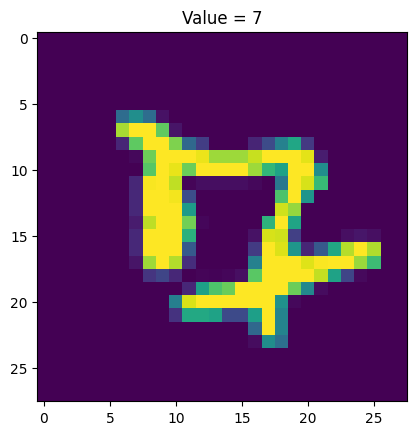

La valeur de prédiction est : 0
La liste des probabilitées est la suivante :
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [40]:
pred = pd.DataFrame({"true_val" : label_test, "pred_val" : prediction.argmax(axis=1)})
false_pred = pred[pred["true_val"] != pred["pred_val"]]
false_num = random.choice(false_pred.index)
plt.imshow(image_test[false_num])
plt.title("Value = " + str(label_test[false_num]))
plt.show()
print("La valeur de prédiction est : " + str(prediction[false_num].argmax()))
print("La liste des probabilitées est la suivante :")
print(np.round(prediction[false_num],3))

# Model avec 1 couche de convolution

Les réseau de neurones à convolution reprennent la principe de convolution en traitement de l'image. Pour ce faire nous avons une image de taille n x m (dans notre cas 28 x 28) et un ou plusieurs kernels (ici on en utilise 32) qui sont des matrices de taille i x j (dans notre cas 3 x 3).

En sortie d'une opération de convolution nous obtenons un matrice de taille (n-i+1) x (m-j+1). Cependant, ce n'est pas ce que renvoie le layer. Un convolutional layer prend en entrée un tenseur de dimension 3, hauteur, largeur, nombre de superpostion(dans keras il y a un dimension supplémentaire correspondant à la taille du batch) et renvoie en sortie un tenseur de dimension 3, hauteur, largeur, nombre de kernels. Le convolutional layer va donc renvoyer la liste des images obtenue pour chaque kernel sachant que chaque kernel prend toutes les images d'entrée.

Une convolutional layer est souvent suivi d'une maxpooling layer. Son but est de réduire le nombre de calcul à la sortie d'une convolutional layer ainsi que de diminuer les chances de sur apprentissage. Pour se faire elle va découper l'image en petite tuile (dans notre cas les tuiles sont de taille 2 x 2) puis créer une nouvelle image en ne gardant que la valeur maximal de chaque. Nous avons donc une image plus petite en sortie.

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3593 - accuracy: 0.8982 - val_loss: 0.2046 - val_accuracy: 0.9394
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1928 - accuracy: 0.9434 - val_loss: 0.1316 - val_accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1573 - accuracy: 0.9541 - val_loss: 0.1120 - val_accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1415 - accuracy: 0.9593 - val_loss: 0.1056 - val_accuracy: 0.9694
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1330 - accuracy: 0.9622 - val_loss: 0.0943 - val_accuracy: 0.9721


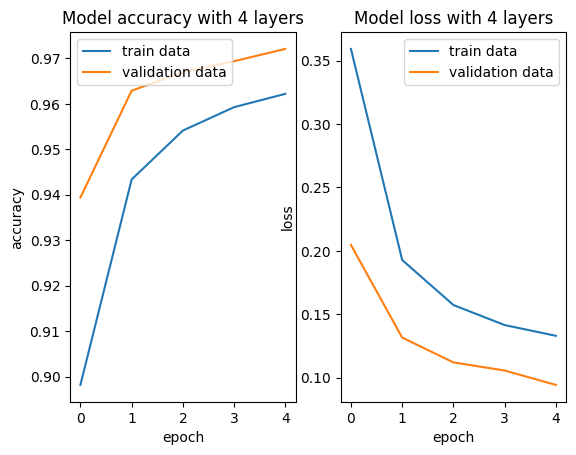

In [41]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(), # flatten the output
        keras.layers.Dropout(0.5), # prevent from overfitting
        keras.layers.Dense(num_classes, activation="softmax"), # output layer
    ]
)

modelTraining(model,x_train, y_train,x_test,y_test,5)

En regardant les graphique on remarque que nous avons des résultats comparable à ceux du réseau à une couche classique sauf que les performances sur les données de validation sur supérieur à celle sur les données d'entrainement. Nous n'avons donc plus de problème de surapprentissage.

# Model avec 2 couches de convolution

Dans ce deuxième réseau convolutif, nous avons ajouté une seconde couche de convolution avec 64 kernel. Cela nous permet d'avoir en sortie des performance amélioré par rapport au réseau de neuronne précédent.

Epoch 1/5
1875/1875 [==============================] - 64s 33ms/step - loss: 0.2635 - accuracy: 0.9199 - val_loss: 0.0880 - val_accuracy: 0.9733
Epoch 2/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1060 - accuracy: 0.9682 - val_loss: 0.0578 - val_accuracy: 0.9811
Epoch 3/5
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0827 - accuracy: 0.9747 - val_loss: 0.0482 - val_accuracy: 0.9838
Epoch 4/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0714 - accuracy: 0.9784 - val_loss: 0.0424 - val_accuracy: 0.9874
Epoch 5/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0646 - accuracy: 0.9800 - val_loss: 0.0402 - val_accuracy: 0.9871


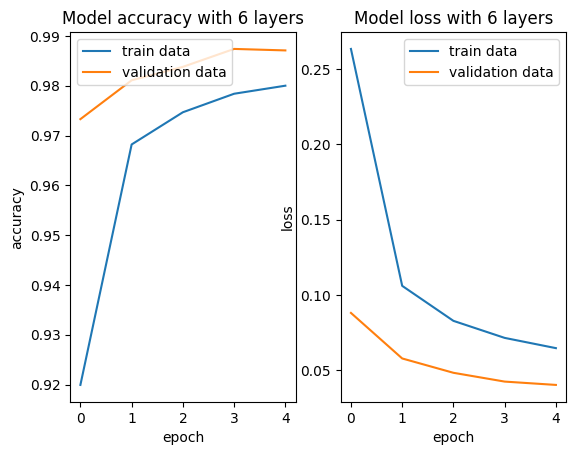

In [42]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(), # flatten the output
        keras.layers.Dropout(0.5), # prevent from overfitting
        keras.layers.Dense(num_classes, activation="softmax"), # output layer
    ]
)

modelTraining(model,x_train, y_train,x_test,y_test,5)